In [21]:
# Importing necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset from CSV file
data = pd.read_csv('boston_housing.csv')

In [23]:
# Separate features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

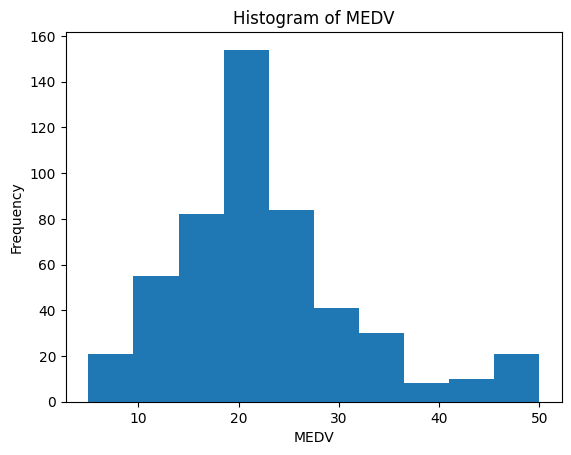

In [25]:
import matplotlib.pyplot as plt
# For example, to plot a histogram of the 'MEDV' column:
plt.hist(data['MEDV'])
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Histogram of MEDV')
plt.show()

In [26]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Data preprocessing: standardize the features and target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [28]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])


In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [30]:
# Train the model
history = model.fit(x_train_scaled, y_train_scaled, batch_size=32, epochs=10, validation_data=(x_test_scaled, y_test_scaled))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.8821 - mae: 0.7193 - val_loss: 0.4598 - val_mae: 0.4457
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3348 - mae: 0.4184 - val_loss: 0.3674 - val_mae: 0.4081
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4019 - mae: 0.4733 - val_loss: 0.3384 - val_mae: 0.3785
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3589 - mae: 0.4557 - val_loss: 0.3655 - val_mae: 0.3929
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3427 - mae: 0.4361 - val_loss: 0.3372 - val_mae: 0.3745
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2896 - mae: 0.4013 - val_loss: 0.3569 - val_mae: 0.3970
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3073 - mae: 0.3966 - val_loss: 0.3366 - val_mae: 0.3754
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2819 - mae: 0.3902 - val_loss: 0.3769 - val_mae: 0.4128
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3191 - mae

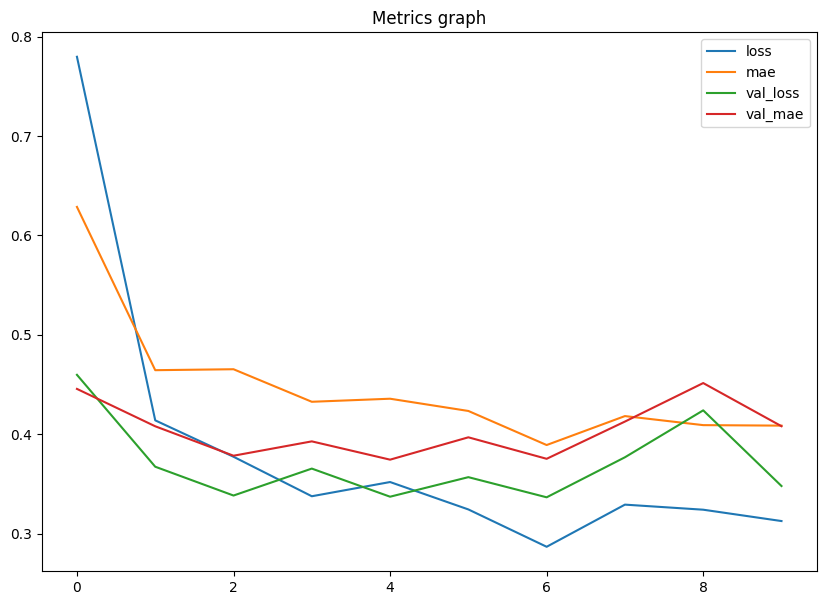

In [31]:
# Plot training history
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [32]:
# Predict on test data
y_pred_scaled = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [33]:
# Inverse scaling of predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)


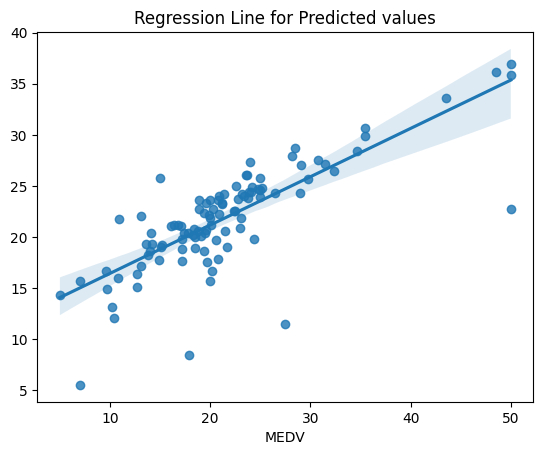

In [34]:
# Plot regression line
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [35]:
# Function to display regression metrics
def regression_metrics_display(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print(f"MAE is {mae}")
    print(f"MSE is {mse}")
    print(f"R2 score is {r2}")


In [36]:
# Display regression metrics
regression_metrics_display(y_test, y_pred)

MAE is 3.8042182118284935
MSE is 30.23060100539573
R2 score is 0.5877670603832708


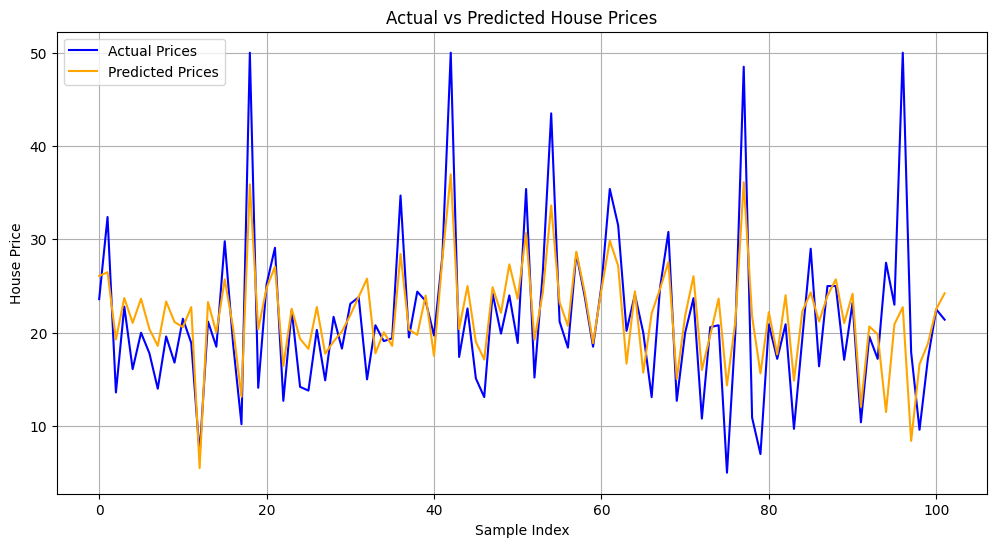

In [37]:
# Plotting actual and predicted house prices for each sample
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()
